# Binary Systems in Astrophysics WS 2021/2022

Today's tutorial is the second out of two. We will simulate data from an eclipsing binary, in preparation for the poster presentation. Particularly, we will use the package PHOEBE (v2.3.57, http://phoebe-project.org/). This tutorial is based on the online tutorials from the PHOEBE documentation (http://phoebe-project.org/docs/2.3/tutorials). If you are interested in the project, you will find more information in Prša and Zwitter 2005 (https://iopscience.iop.org/article/10.1086/430591) or Conroy et al. 2020 (https://iopscience.iop.org/article/10.3847/1538-4365/abb4e2).

To install it, run the following line in your terminal:

$ pip install phoebe

Remember that, as always, you can get this jupyter notebook entering your local binary folder linked to GitLab and pulling the new material:

$ git pull


## 6. Eclipsing Binaries 2: Simulating binary systems

First of all, we should check that our installation properly works

In [1]:
import phoebe
from phoebe import u # units

Good :D. Let's load the rest of packages that we will need

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Now we can start. We need to initialise a "binary system" object (or bundle, as it is called in PHOEBE)

In [3]:
b = phoebe.default_binary()

This object has a certain hierarchy. The orbit includes inside two stars, a primary and a secondary

In [4]:
b.get_hierarchy()

<HierarchyParameter: orbit:binary(star:primary, star:secondary)>

In [5]:
print(b.hierarchy.get_stars())

['primary', 'secondary']


In [6]:
print(b.hierarchy.get_orbits())

['binary']


This object contains already all parameters of the system

In [7]:
b.get_value('q')# Mass ratio

1.0

In [8]:
b.get_value('ecc') #Eccentricity

0.0

In [9]:
b.get_value('incl@orbit') # Inclination

90.0

In [10]:
b.get_value('mass@primary@component') # Mass primary (in solar masses)

0.9988131358058301

In [11]:
b.get_value('period@binary') # Period

1.0

In [12]:
b.get_value('sma@orbit') # Semi-major axis

5.3

In [13]:
b.get_value('teff@primary') # Effective temperature (in K)

6000.0

In [14]:
b.get_value('t0_perpass@binary@component') # Periastron passage

-0.25

Of course, all this parameters are related, and there is an internal hierarchy that will update the parameters automatically

In [44]:
print(b['q'])

Parameter: q@binary@component
                       Qualifier: q
                     Description: Mass ratio
                           Value: 0.8
                  Constrained by: 
                      Constrains: pot@contact_envelope@component, requiv@secondary@component, fillout_factor@contact_envelope@component, pot_min@contact_envelope@component, pot_max@contact_envelope@component, mass@primary@component, sma@primary@component, asini@primary@component, requiv_max@primary@component, requiv_min@primary@component, mass@secondary@component, sma@secondary@component, asini@secondary@component, requiv_max@secondary@component, requiv_min@secondary@component
                      Related to: requiv@primary@component, sma@binary@component, pot@contact_envelope@component, requiv@secondary@component, fillout_factor@contact_envelope@component, pot_min@contact_envelope@component, pot_max@contact_envelope@component, period@binary@component, mass@primary@component, sma@primary@component, incl@

So, let's simulate a system with

In [41]:
b = phoebe.default_binary(contact_binary=True)
b.set_value('q', 0.8)
b.set_value('ecc', 0.6)
b.set_value('incl@orbit',85)

In PHOEBE we have to create "datasets". Those are for orbits, light curves, radial velocities, ... And can be either simulated or loaded from real data.

In [42]:
b.add_dataset('orb', compute_times=np.linspace(0,4,1000), dataset='orb01', component=['primary', 'secondary'],overwrite=True)
b.add_dataset('lc',compute_times=np.linspace(0,4,1000),dataset='lc01',overwrite=True)

<ParameterSet: 78 parameters | contexts: constraint, compute, figure, dataset>

The previous lines where just the preparation. Now we have to actually compute it

In [43]:
b.run_compute()

ValueError: failed to pass checks
Run Checks Report: FAIL
ERROR: contact binaries must be circular, but ecc@binary!=0 (1 affected parameters, affecting system,run_compute)
ERROR: contact binaries must be circular, but ecc@binary!=0 (1 affected parameters, affecting system,run_compute)

Now we can already try to visualize the data

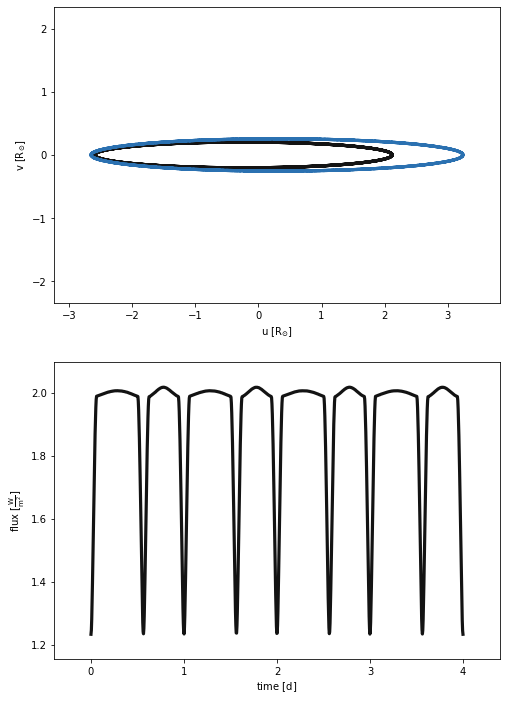

In [19]:
afig, mplfig = b.plot(show=True)

What is all this? On top we can see the projection in the sky of the orbits of the two stars around the center of mass. On the bottom we see the light curve of the eclipses.

But we can plot many other visualisations!

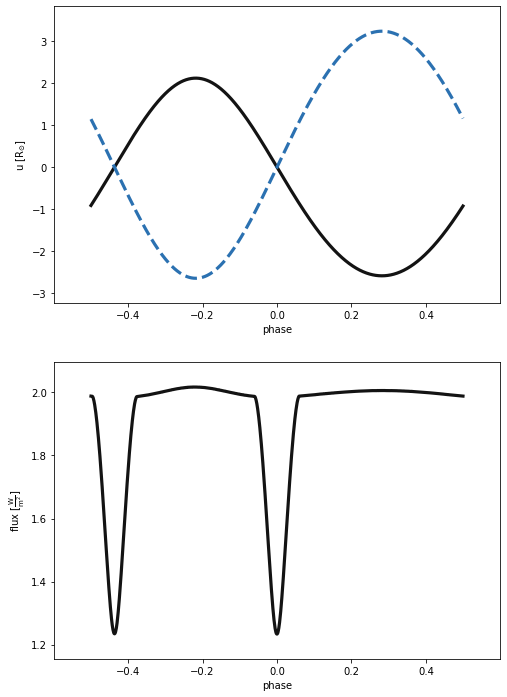

In [20]:
afig, mplfig = b.plot(x='phases', show=True)

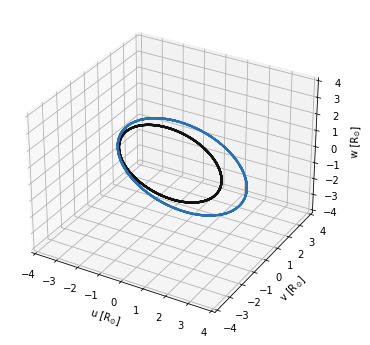

In [21]:
afig, mplfig = b['orb'].plot(projection='3d', xlim=(-4,4), ylim=(-4,4), zlim=(-4,4), show=True)

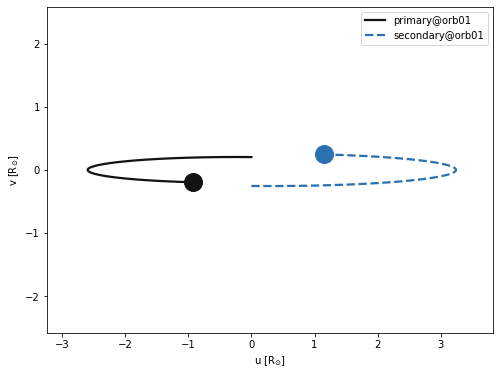

In [22]:
afig = b['orb'].plot(time=0.5, uncover=True, show=True, legend=True)
# Shows half of the orbit and the position of the stars

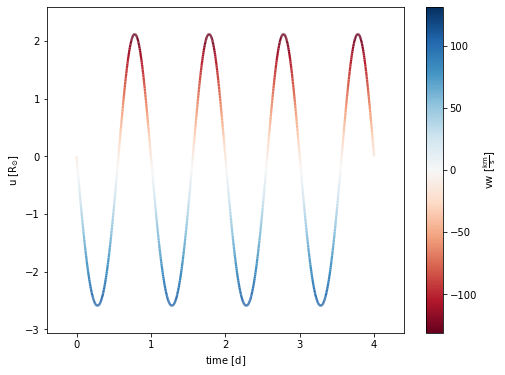

In [66]:
afig, mplfig = b['orb@primary'].plot(x='times', c='vws', draw_sidebars=True, show=True)

### Exercise:

Try out various systems:

- How will you see variations in the inclination?
- Which effect does have the eccentricity?
- And the impact of the mass ratio?
- Finally, test what occurs changing the effective temperature.